In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Import & Pre-processing

In [2]:
filename = "data/YolmoTone-Perception-results-full.csv"

In [3]:
data = pd.read_csv(filename)
df_wide = data.copy()

In [4]:
df_wide.dtypes

Condition     object
Tone          object
Speaker       object
Word          object
L01            int64
L02            int64
L03            int64
L04            int64
L05            int64
L06            int64
L07            int64
L08            int64
L09            int64
L10          float64
L11            int64
L12            int64
dtype: object

In [5]:
# Replace NaN in L10 column with 0
df_wide['L10'] = df_wide['L10'].fillna(0).astype('int64')
#df_wide['L10']

In [6]:
pd.set_option('display.max_rows', len(df_wide))
df_wide

,Condition,Tone,Speaker,Word,L01,L02,L03,L04,L05,L06,L07,L08,L09,L10,L11,L12
0,Isol1,Low,YolFem,chew,1,1,1,1,1,1,0,0,1,1,1,1
1,Carrier1,Low,YolFem,chew,1,1,1,1,1,1,1,0,1,0,1,1
2,Isol3,Low,YolFem,chew,1,0,1,1,0,1,1,0,0,0,1,1
3,Isol3,Low,KagMal,chew,1,1,1,1,1,1,1,0,1,1,1,1
4,Isol1,Low,KagMal,chew,1,1,0,1,1,1,1,0,1,1,1,1
5,Isol1,Low,KagFem,chew,0,1,0,1,1,1,1,0,1,0,0,0
6,Isol3,Low,KagFem,chew,1,1,1,1,1,1,1,0,1,0,0,0
7,Isol3,Low,YolFem,fall,1,1,1,1,0,1,1,0,1,1,0,1
8,Isol1,Low,YolFem,fall,1,1,0,1,1,1,1,1,0,1,0,1
9,Isol1,Low,KagMal,fall,1,1,0,0,0,1,1,0,0,1,1,1


In [7]:
# Convert dataframe from wide format to long format
listener_list = ['L01', 'L02', 'L03', 'L04', 'L05', 'L06', 'L07', 'L08', 'L09', 'L10', 'L11', 'L12']

df_long = pd.melt(df_wide,
               id_vars=['Condition', 'Tone', 'Speaker', 'Word'],
               value_vars = listener_list,
               var_name = 'listener_id',
               value_name = 'is_correct')

df_long.columns = [x.lower() for x in df_long.columns]

# Add column with the listener's actual response
def get_actual_response(df):
    if (df['is_correct'] == 1):
        return df['tone']
    elif (df['tone'] == "Low"):
        return "High"
    else:
        return "Low"

df_long['response'] = df_long.apply(get_actual_response, axis = 1)
df_long = df_long.rename(columns = {'tone': 'actual_tone'})

In [8]:
#pd.set_option('display.max_rows', len(df_long))
df_long.head(25)

,condition,actual_tone,speaker,word,listener_id,is_correct,response
0,Isol1,Low,YolFem,chew,L01,1,Low
1,Carrier1,Low,YolFem,chew,L01,1,Low
2,Isol3,Low,YolFem,chew,L01,1,Low
3,Isol3,Low,KagMal,chew,L01,1,Low
4,Isol1,Low,KagMal,chew,L01,1,Low
5,Isol1,Low,KagFem,chew,L01,0,High
6,Isol3,Low,KagFem,chew,L01,1,Low
7,Isol3,Low,YolFem,fall,L01,1,Low
8,Isol1,Low,YolFem,fall,L01,1,Low
9,Isol1,Low,KagMal,fall,L01,1,Low


## Calculate overall accuracy score

In [9]:
df = df_long

## Get accuracy score by Tone
accuracy_tone_summ = df.groupby(['actual_tone'], as_index=False)['is_correct'].describe().iloc[:, 0:3] # we only need first 3 columns
accuracy_tone_summ = accuracy_tone_summ.rename(columns = {'mean': 'accuracy_score'})
accuracy_tone_summ

,actual_tone,count,accuracy_score
0,High,768.0,0.757812
1,Low,672.0,0.824405


In [10]:
## Get accuracy score by Condition
accuracy_condition_summ = df.groupby(['condition'], as_index=False)['is_correct'].describe().iloc[:, 0:3]
accuracy_condition_summ = accuracy_condition_summ.rename(columns = {'mean': 'accuracy_score'})
accuracy_condition_summ

,condition,count,accuracy_score
0,Carrier1,444.0,0.858108
1,Isol1,540.0,0.772222
2,Isol3,456.0,0.741228


In [11]:
## Get accuracy score by Listener
accuracy_listener_summ = df.groupby(['listener_id'], as_index=False)['is_correct'].describe().iloc[:, 0:3]
accuracy_listener_summ = accuracy_listener_summ.rename(columns = {'mean': 'accuracy_score'})
accuracy_listener_summ

,listener_id,count,accuracy_score
0,L01,120.0,0.758333
1,L02,120.0,0.800000
2,L03,120.0,0.791667
3,L04,120.0,0.816667
4,L05,120.0,0.825000
5,L06,120.0,0.766667
6,L07,120.0,0.600000
7,L08,120.0,0.783333
8,L09,120.0,0.716667
9,L10,120.0,0.833333


## Calculate accuracy scores by Tone x Listener

In [12]:
## Get accuracy score by Tone x Listener
accuracy_tone_listener_summ = df.groupby(['actual_tone', 'listener_id'], as_index=False)['is_correct'].describe().iloc[:, 0:4]
accuracy_tone_listener_summ = accuracy_tone_listener_summ.rename(columns = {'mean': 'accuracy_score'})
accuracy_tone_listener_summ

,actual_tone,listener_id,count,accuracy_score
0,High,L01,64.0,0.593750
1,High,L02,64.0,0.656250
2,High,L03,64.0,0.781250
3,High,L04,64.0,0.750000
4,High,L05,64.0,0.750000
5,High,L06,64.0,0.578125
6,High,L07,64.0,0.578125
7,High,L08,64.0,0.937500
8,High,L09,64.0,0.718750
9,High,L10,64.0,0.859375


[Text(0.5, 0, 'Actual Tone'), Text(0, 0.5, 'Accuracy score')]

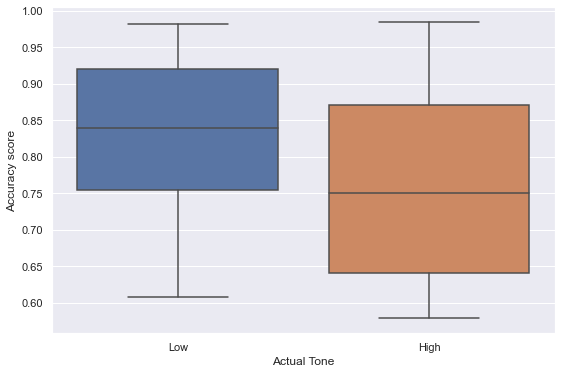

In [13]:
# Create plot
plt.figure(figsize = (9, 6))

sns.boxplot(x = 'actual_tone', y = 'accuracy_score', order=['Low','High'],
            data = accuracy_tone_listener_summ).set(
    xlabel = 'Actual Tone',
    ylabel = 'Accuracy score')

In [14]:
## Get summary stats averaging across listeners
accuracy_tone_listener_mean = accuracy_tone_listener_summ.groupby(['actual_tone'], as_index=False)['accuracy_score'].describe()
accuracy_tone_listener_mean

,actual_tone,count,mean,std,min,25%,50%,75%,max
0,High,12.0,0.757812,0.141412,0.578125,0.640625,0.750000,0.871094,0.984375
1,Low,12.0,0.824405,0.126918,0.607143,0.754464,0.839286,0.919643,0.982143


## Calculate accuracy scores by Tone x Condition (carrier vs isol)

In [15]:
## Get accuracy score by Condition x Tone
accuracy_condition_tone_summ = df.groupby(['condition', 'actual_tone'], as_index=False)['is_correct'].describe().iloc[:, 0:4]
accuracy_condition_tone_summ = accuracy_condition_tone_summ.rename(columns = {'mean': 'accuracy_score'})
accuracy_condition_tone_summ

,condition,actual_tone,count,accuracy_score
0,Carrier1,High,240.0,0.820833
1,Carrier1,Low,204.0,0.901961
2,Isol1,High,276.0,0.717391
3,Isol1,Low,264.0,0.829545
4,Isol3,High,252.0,0.742063
5,Isol3,Low,204.0,0.740196


In [16]:
## Get accuracy score by Condition x Tone x Listener
accuracy_condition_tone_listener_summ = df.groupby(['condition', 'actual_tone', 'listener_id'], as_index=False)['is_correct'].describe().iloc[:, 0:5]
accuracy_condition_tone_listener_summ = accuracy_condition_tone_listener_summ.rename(columns = {'mean': 'accuracy_score'})
accuracy_condition_tone_listener_summ

,condition,actual_tone,listener_id,count,accuracy_score
0,Carrier1,High,L01,20.0,0.750000
1,Carrier1,High,L02,20.0,0.750000
2,Carrier1,High,L03,20.0,0.800000
3,Carrier1,High,L04,20.0,0.750000
4,Carrier1,High,L05,20.0,0.850000
5,Carrier1,High,L06,20.0,0.650000
6,Carrier1,High,L07,20.0,0.700000
7,Carrier1,High,L08,20.0,0.950000
8,Carrier1,High,L09,20.0,0.650000
9,Carrier1,High,L10,20.0,1.000000


[Text(0.5, 0, 'Condition'), Text(0, 0.5, 'Accuracy score')]

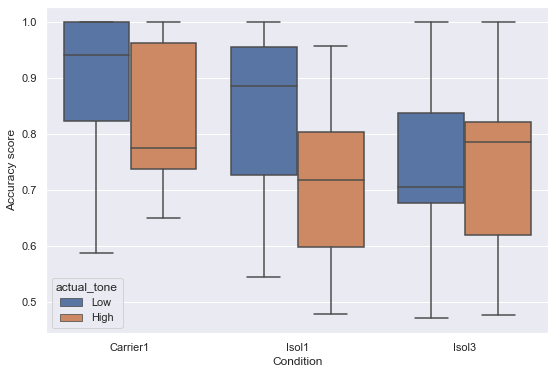

In [17]:
# Create plot
plt.figure(figsize = (9, 6))

sns.boxplot(x = 'condition', y = 'accuracy_score', hue = "actual_tone", hue_order = ['Low', 'High'],
            data = accuracy_condition_tone_listener_summ).set(
    xlabel = 'Condition',
    ylabel = 'Accuracy score')


In [18]:
## Get summary stats averaging across listeners
accuracy_condition_tone_listener_mean = accuracy_condition_tone_listener_summ.groupby(['condition', 'actual_tone'], as_index=False)['accuracy_score'].describe()
accuracy_condition_tone_listener_mean

,condition,actual_tone,count,mean,std,min,25%,50%,75%,max
0,Carrier1,High,12.0,0.820833,0.135610,0.650000,0.737500,0.775000,0.962500,1.000000
1,Carrier1,Low,12.0,0.901961,0.121160,0.588235,0.823529,0.941176,1.000000,1.000000
2,Isol1,High,12.0,0.717391,0.150042,0.478261,0.597826,0.717391,0.804348,0.956522
3,Isol1,Low,12.0,0.829545,0.165741,0.545455,0.727273,0.886364,0.954545,1.000000
4,Isol3,High,12.0,0.742063,0.168001,0.476190,0.619048,0.785714,0.821429,1.000000
5,Isol3,Low,12.0,0.740196,0.153513,0.470588,0.676471,0.705882,0.838235,1.000000


## Generate confusion matrices

In [19]:
listener_list = ['L01', 'L02', 'L03', 'L04', 'L05', 'L06', 'L07', 'L08', 'L09', 'L10', 'L11', 'L12']

def get_confusion_matrix(df0):
    output = []
    listener = listener_list
    for listener in df0[listener]:
        df1 = df0.iloc[np.where(df0['Tone'] == "Low")].reset_index(drop = True)
        df2 = df0.iloc[np.where(df0['Tone'] == "High")].reset_index(drop = True)
        correct_actual_low = sum(df1[listener])
        correct_actual_high = sum(df2[listener])
        incorrect_actual_low = len(df1)- sum(df1[listener])
        incorrect_actual_high = len(df2)- sum(df2[listener])
        output.append([[correct_actual_low, incorrect_actual_low], [incorrect_actual_high, correct_actual_high]])
    return(np.array(output))
         

In [20]:
# Generate listener-specific confusion matrices
confusion_matrix_all = get_confusion_matrix(df_wide)
confusion_matrix_all

array([[[53,  3],
        [26, 38]],

       [[54,  2],
        [22, 42]],

       [[45, 11],
        [14, 50]],

       [[50,  6],
        [16, 48]],

       [[51,  5],
        [16, 48]],

       [[55,  1],
        [27, 37]],

       [[35, 21],
        [27, 37]],

       [[34, 22],
        [ 4, 60]],

       [[40, 16],
        [18, 46]],

       [[45, 11],
        [ 9, 55]],

       [[43, 13],
        [ 6, 58]],

       [[49,  7],
        [ 1, 63]]])

In [21]:
# Sum up listener-specific confusion matrices to get overall confusion matrix
sum(confusion_matrix_all[0:])

array([[554, 118],
       [186, 582]])

In [22]:
# Slice df by carrier phrase condition
df = df_wide
carrier = df.iloc[np.where(df['Condition'] == "Carrier1")].reset_index(drop = True)
isol1 = df.iloc[np.where(df['Condition'] == "Isol1")].reset_index(drop = True)
isol3 = df.iloc[np.where(df['Condition'] == "Isol3")].reset_index(drop = True)

In [23]:
confusion_matrix_carrier = get_confusion_matrix(carrier)
sum(confusion_matrix_carrier[0:])

array([[184,  20],
       [ 43, 197]])

In [24]:
confusion_matrix_isol1 = get_confusion_matrix(isol1)
sum(confusion_matrix_isol1[0:])

array([[219,  45],
       [ 78, 198]])

In [25]:
confusion_matrix_isol3 = get_confusion_matrix(isol3)
sum(confusion_matrix_isol3[0:])

array([[151,  53],
       [ 65, 187]])

# Statistical tests

In [36]:
# Compare accuracy score with 50% within each condition
accuracy_condition_tone_summ['success'] = accuracy_condition_tone_summ['count'] * accuracy_condition_tone_summ['accuracy_score']
accuracy_condition_tone_summ

for i in range(6):
    print(accuracy_condition_tone_summ.iloc[i,0], accuracy_condition_tone_summ.iloc[i,1], proportions_ztest(accuracy_condition_tone_summ.iloc[i,4], accuracy_condition_tone_summ.iloc[i,2], value = 0.5))


Carrier1 High (12.960716323982256, 2.043304646341027e-38)
Carrier1 Low (19.306565677532337, 4.7299846470128234e-83)
Isol1 High (8.020951585420791, 1.0492908262448426e-15)
Isol1 Low (14.239439730397278, 5.214342109981988e-46)
Isol3 High (8.783197001552397, 1.588925240593439e-18)
Isol3 Low (7.823205803512297, 5.149481445828827e-15)


In [38]:
accuracy_condition_summ

,condition,count,accuracy_score
0,Carrier1,444.0,0.858108
1,Isol1,540.0,0.772222
2,Isol3,456.0,0.741228


In [ ]:
# Compare accuracy score across conditions (no tone separation)




In [ ]:
# Compare accuracy score across conditions (with High and Low tone separation)

